In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import font_manager

font_fname = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

In [7]:
def value_counts_df(ser, ascending=False):
    df = pd.concat([ser.value_counts(ascending=ascending),
                    ser.value_counts(normalize=True).apply('{:4f}'.format)], axis=1)
    df.columns = ['Count', 'Pct']
    return df

In [3]:
df = pd.read_csv('datasets/apart_survey.txt', sep='\t')import pandas as pd

df.head()

,NUM,구분정리,발표적합여부,설문차수,구분 #1,구분 #2,구분 #3,중요도,질문
0,1,거래량,포함,오프라인_2차,거래량,매매,매매감소,A,리모델링 추진 아파트는 매매량이 감소하지 않나요?
1,2,건폐/용적율,포함,오프라인_2차,건폐/용적율,NaN,NaN,B,우리단지의 건폐율이 너무 높은 것 아닌가요?
2,3,건폐/용적율,포함,오프라인_2차,건폐/용적율,NaN,NaN,B,우리단지 용적률이 너무 높은데 사업성이 있나요?
3,4,관리비,포함,오프라인_2차,관리비,관리비 증가,NaN,B,리모델링이 되면 관리비가 크게 늘어나지 않나요?(커뮤니티 시설 등)
4,60,구조/설계,포함,온라인_2차,구조,별동 증축,일조권,A,별동 증축으로 304동간의 동간거리 조망권 일조권 확보 등의 구체적인 방안의 내용을...


문항별 결측값 체크

In [5]:
df.isnull().sum()

NUM        0
구분정리       0
발표적합여부     0
설문차수       0
구분 #1      0
구분 #2      7
구분 #3     46
중요도        0
질문         0
dtype: int64

유효응답건수 분석

In [9]:
print("유효응답건수 : ", len(df))
value_counts_df(df['구분정리'])

유효응답건수 :  65


,Count,Pct
구조/설계,23,0.353846
분담금,11,0.169231
리모델링 이유,6,0.092308
사업기간,4,0.061538
이주비,4,0.061538
기타,4,0.061538
조합설립,3,0.046154
시공사,2,0.030769
건폐/용적율,2,0.030769
동향,1,0.015385


In [16]:
value_counts_df(df['구분 #1'])

,Count,Pct
분담금,9,0.138462
구조,9,0.138462
기타,6,0.092308
이주비,4,0.061538
설계,4,0.061538
리모델링 이유,4,0.061538
조합설립,3,0.046154
사업기간,3,0.046154
특화시설,3,0.046154
안전,2,0.030769


Text(0.5, 1.0, '리모델링 설문 분석(질문유형별 비중)')

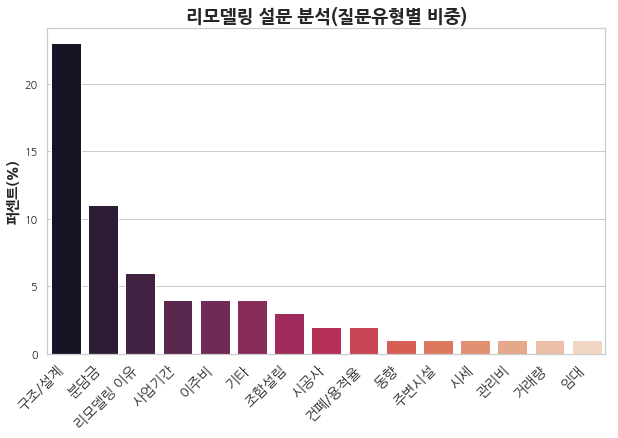

In [131]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10,6))

font_fname = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

ser = df['구분정리'].value_counts()
sns.barplot(x=ser.index, y=ser.values, palette="rocket")
plt.ylabel("퍼센트(%)", fontdict={'weight': 'bold', 'size':14})
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.title("리모델링 설문 분석(질문유형별 비중)",  fontdict={'weight': 'bold', 'size':18})

# 워드 클라우드  
https://financedata.github.io/posts/python_news_cloud_text.html

In [51]:
nouns = pd.concat([df['구분정리'], df['구분 #1']])

# 삭제
nouns = nouns[~nouns.str.contains('기타|반대', regex=True)]
# 값 대체
replace_dict = {'구조/설계':'단지구조변경', 
                '구조':'단지구조변경',
                '건폐/용적율':'건폐율용적율',
                '리모델링 이유':'리모델링추진이유',
                '동향':'리모델링동향',
                '주변시설':'아파트주변환경개선'}
nouns.replace(replace_dict, inplace=True)

value_counts_df(nouns)

,Count,Pct
단지구조변경,32,0.268908
분담금,20,0.168067
리모델링추진이유,10,0.084034
이주비,8,0.067227
사업기간,7,0.058824
조합설립,6,0.050420
건폐율용적율,4,0.033613
설계,4,0.033613
시공사,4,0.033613
특화시설,3,0.025210


In [52]:
count = Counter(nouns)
tags = count.most_common(30)
tags[:10]

[('단지구조변경', 32),
 ('분담금', 20),
 ('리모델링추진이유', 10),
 ('이주비', 8),
 ('사업기간', 7),
 ('조합설립', 6),
 ('건폐율용적율', 4),
 ('시공사', 4),
 ('설계', 4),
 ('특화시설', 3)]

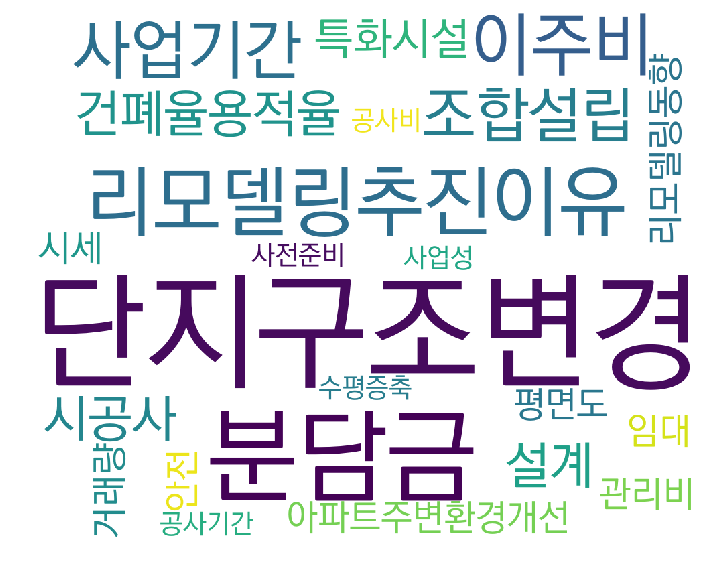

In [78]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\KoPubWorld Dotum_Pro Medium.otf', 
               background_color='white', 
               max_font_size=200,
               width=1000, 
               height=800,
               random_state=39)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(cloud)

폰트를 살짝 바꿔보자

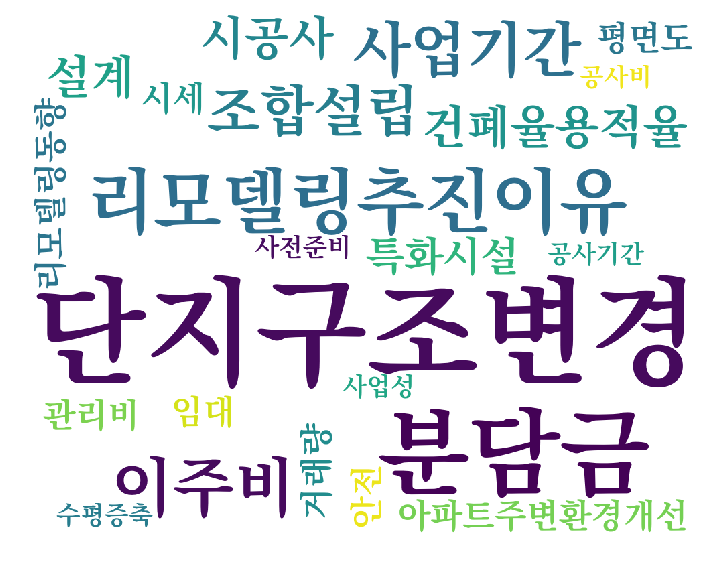

In [79]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\KoPubWorld Batang_Pro Bold', 
               background_color='white', 
               max_font_size=200,
               width=1000, 
               height=800,
               random_state=39)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(cloud)